# In this task we are going to perform a classification task.

# The data contains the exam 1 and exam 2 scores of the student, and if they are admitted or not.

# The task is to classify whether the student will be admitted or not based on the exam 1 and exam 2 score.

In [4]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

Import the lbraries

In [6]:
# Your code to important Libraries - You need to import multiple libraries.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("Matplotlib version:", matplotlib.__version__)
from scipy import optimize

Matplotlib version: 3.7.1


# Read the data and split it into X and y.

# X is the exam scores and y is the binary variable to determine if a student is admitted or not.



In [7]:
data = np.loadtxt("ex2data1.txt", delimiter=',')  # Note - The data is read using numpy rather than pandas.
X = data[:, [0, 1]]
y = data[:, 2]

# Print some samples of the input X

In [8]:
# Your code to print samples of X
print(X)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

# Print some samples of the output y

In [9]:
# Your code to print samples of y
print(y)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]


# Plot the data

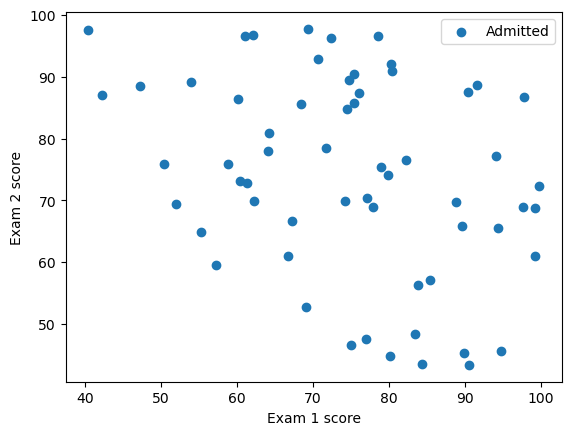

In [10]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
# Your code to plot all samples with target value 0


plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

# Function for the Sigmoid

# $g(z) = \frac {1}{1 + e ^{-z}}$

In [12]:
def sigmoid(z):
    # Your code to calculate the sigmoid values and then return it. Hint - np.exp()
    return 1 / (1 + np.exp(-z))

# Plot the sigmod function.

# X axis will have numbers from -10 to 10 (could be any other range). Hint - You can use np.linespace or np.arange methods.

# y will have sigmoid function values.

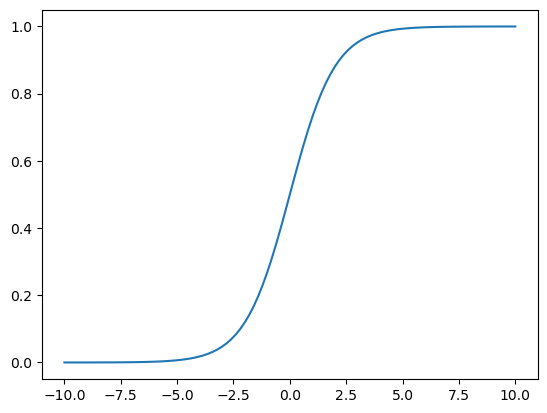

In [14]:
# Your code to plot x vs sigmoid (x) function. x is range from -10 to 10. 
# y can be obtained by calling the function defined earlier
plt.plot()
x = np.linspace(-10, 10, 101)
plt.plot(x, sigmoid(x))
plt.show()

# Define a function to calculate the cost.

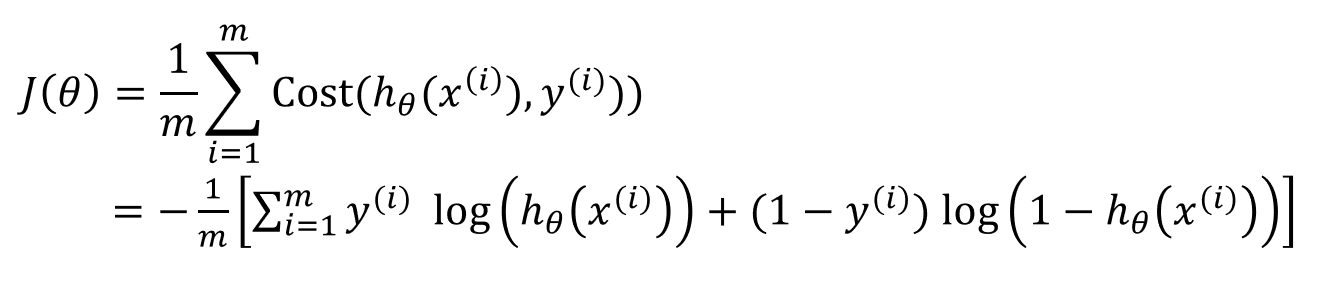

# Hint - Use the sigmoid function output, np.dot, and np.log functions.

In [16]:
def cost(theta, X, y):

    # Your code to calculate the cost based on inputs - theta, X, y. 
    h= sigmoid(np.dot(X,theta))
    J= -(np.dot(y, np.log(h)) + np.dot(1-y,np.log(1-h))) /X.shape[0]
    # 2-3 lines of code.  Assign cost to the variable J and return it.

    return J

# Define a function to calculate gradients of cost function with respect to the theta.

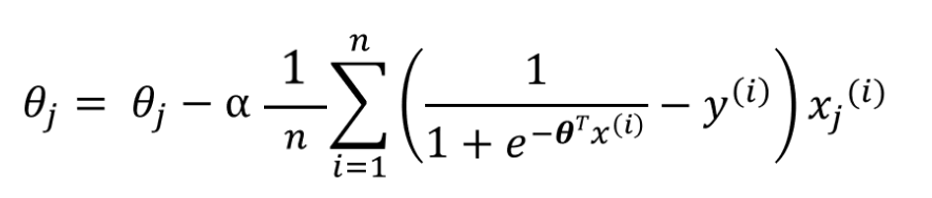

In [17]:
def gradient(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, h - y) / X.shape[0]
    return grad

# Combine everything together.

# This time we will use optimize function from scipy rather than writing gradient descent code from scratch

In [19]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем единичный столбец в X

# Your code to print samples of X_train:
print(X_train)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

In [21]:
# initiate 'theta' with zeros:
theta = np.array([0, 0, 0])

# Your code to print 'theta'
print(theta)


[0 0 0]


In [22]:
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y),
                        method='Newton-CG', jac=gradient)    # Note - Optimization method is Newton - CG rather that 
                                                    # gradient descent. You can use other optimization methods too.
print(res.fun)  # 0.203
print(res.x)  # -25.161 0.206 0.201


0.20349770765032205
[-25.15495047   0.20618052   0.2014201 ]


# Plotting the decision boundary

In [23]:
def plotDecisionBoundary(theta, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))
    y_plot = np.dot(X_plot, theta).reshape(xx.shape)

    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not admitted")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
    plt.show()

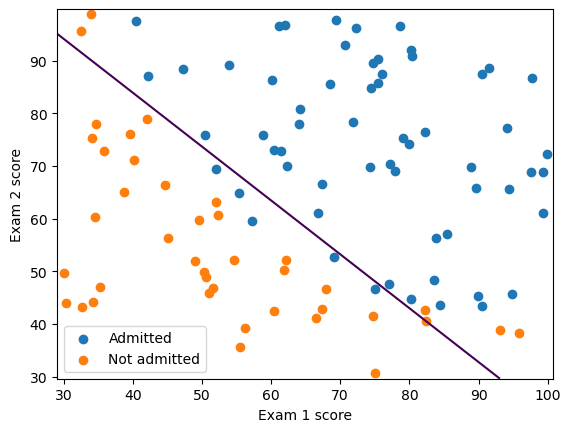

In [24]:
plotDecisionBoundary(res.x, X, y)


# Getting the output - Probabilities.

# What will be the output 1/0 for the following probability?

In [25]:
prob = sigmoid(np.dot(np.array([1, 45, 85]), res.x))
print(prob)  # 0.775 +/- 0.002

0.7762388247881804


# Making predictions

# First, we get input X

# Then probability using sigmod and updated theta values.

# Then we will get output 1/0 based on the probability.

In [28]:
def predict(theta, X):
    X_train = np.hstack((np.ones((X.shape[0], 1)), X))

    # Your code to calculate the probability and convert it to 0 and 1 which will be returned. May be 2-3 lines of code.
    prob= sigmoid(np.dot(X_train, theta))
    return (prob >= 0.5).astype(int)

#  Calculating accuracy - number of correct classification/total number of classification.

In [29]:
np.mean(predict(res.x, X) == y) 


0.89

# **Important-** Document in your lab logbook, final accuracy and the  encrypted value of the accuracy obtained after after multiplying accuracy by your SID i.e. accuracy*SID.  

# **The rest of the notebook is optional. You are encouraged to complete it. But, if you have not, marks will not be deducted.**

# Using SKlearn library to perform logistic regression task.



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from matplotlib.colors import ListedColormap



# Splitting the data into training and test sets

In [32]:
# Your cose to split the data using sklearn train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)

# Scaling the data - Converting everthing between 0-1

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Running Logistc Regression on training data -

# Remember - any kind of fit methiod  will be always used for the training data.

In [34]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Making a prediction on the classifier.

# Making a prediction on the test set dataset.

In [35]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]]


# Getting the accuracy scores.

## Will study in detail in class.



In [36]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ",accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        11
         1.0       1.00      0.79      0.88        14

    accuracy                           0.88        25
   macro avg       0.89      0.89      0.88        25
weighted avg       0.91      0.88      0.88        25

Validation Accuracy:  0.88
None


# Plotting the Confusion Matrix.

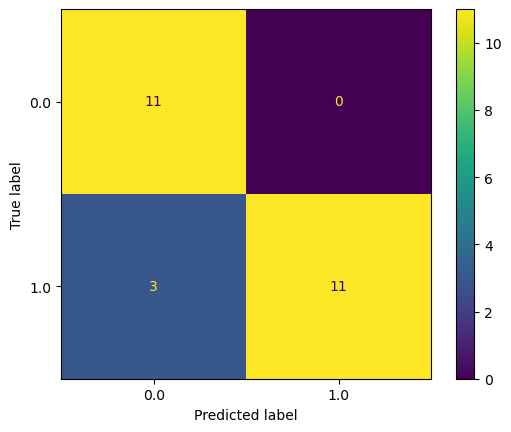

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_17396\3678052554.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


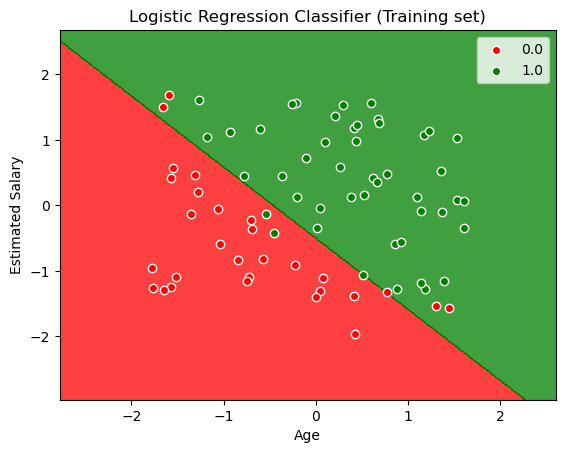

In [38]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X, Y = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

probs = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolor="white")

plt.title('Logistic Regression Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_17396\190239359.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


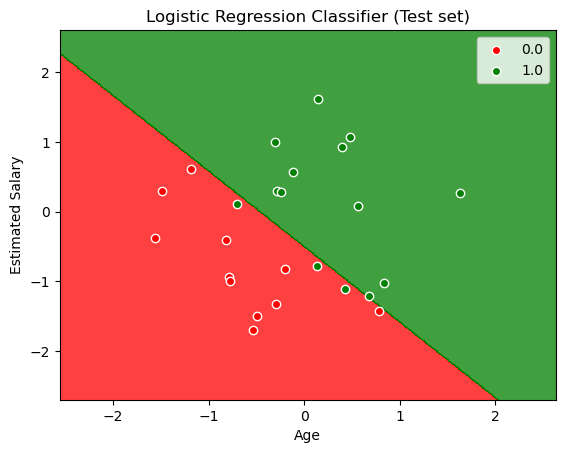

In [39]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X, Y = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

probs = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolor="white")

plt.title('Logistic Regression Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()